# Machine Learning for Security Analysts - Workbook </br> Malicious URL Classifier

---


Author: Chima Caleb C
</br>
Email: chimaclb@gmail.com
</br>
**Context**

Cybersecurity is seriously threatened by malicious websites or URLs. Malicious URLs host unsolicited content (spam, phishing, drive-by downloads, etc.) and deceive users into falling for scams (including financial loss, identity theft, and malware installation), resulting in billions of dollars in losses each year. In order to build a machine learning-based model to recognize malicious urls and prevent them from infecting computer systems or spreading through the internet, I have gathered this dataset, which contains many examples of malicious urls.

**About the Dataset**

The dataset consist of 651,191 URLs, out of which 428103 benign or safe URLs, 96457 defacement URLs, 94111 phishing URLs, and 32520 malware URLs.

For collecting benign, phishing, malware and defacement URLs we have used URL dataset (ISCX-URL-2016) For increasing phishing and malware URLs, we have used Malware domain black list dataset. We have increased benign URLs using faizan git repo At last, we have increased more number of phishing URLs using Phishtank dataset and PhishStorm dataset As we have told you that dataset is collected from different sources. So firstly, we have collected the URLs from different sources into a separate data frame and finally merge them to retain only URLs and their class type.
#### Links to Datasets
1) https://www.unb.ca/cic/datasets/url-2016.html
</br>
2) https://github.com/faizann24/Using-machine-learning-to-detect-malicious-URLs/tree/master/data
</br>
3) https://www.phishtank.com/developer_info.php
</br>
4) https://research.aalto.fi/en/datasets/phishstorm-phishing-legitimate-url-dataset

In [191]:
# importing parkages
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



print("\n### Libraries Imported ###\n")


### Libraries Imported ###



# Load the dataset
With this set, we first need to load our CSV data.

In [89]:
# Load the training data
print("- Loading The Dataset -")
url_df= pd.read_csv("datasets.csv")
url_df = url_df.sample(frac = 1)
test_url = url_df['url'][4]

print("\n### CSV Data Loaded ###\n")

- Loading CSV Data -

### CSV Data Loaded ###



In [90]:
url_df.shape

(651191, 2)

In [91]:
url_df.drop_duplicates(inplace = True)
url_df['type'].value_counts()

benign        428080
defacement     95308
phishing       94092
malware        23645
Name: type, dtype: int64

In [92]:
# Let's see what our training data looks like
print(url_df)

                                                      url      type
350077  ezinearticles.com/?Denzel-Washington-Man-on-Fi...    benign
129489                             twitter.com/Cabooseboy    benign
605868                    www.empirecorp.com/soproces.htm  phishing
439821                      music.yahoo.com/satoshi-ohno/    benign
46295              amazon.com/One-Live-Kiss/dp/B001IBEQP0    benign
...                                                   ...       ...
388889  examiner.com/celebrity-headlines-in-national/t...    benign
535967                http://115.206.120.252:34254/Mozi.m   malware
199751                       spokeo.com/Phyllis+Sanderson    benign
144358  insidecollegehockey.com/inch/2010/09/23/inch-a...    benign
592295  www.emshospital.org.in/css/www.paypal.fr/fr/cg...    benign

[641125 rows x 2 columns]


In [93]:
print(url_df.type.unique())
url_df.type.nunique()

['benign' 'phishing' 'defacement' 'malware']


4

In [94]:
# Perform Train/Test split
test_percentage = .2

train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=42)

labels = train_df['type']
test_labels = test_df['type']

print("\n### Split Complete ###\n")


### Split Complete ###



- Counting Splits -
Training Samples: 512900
Testing Samples: 128225


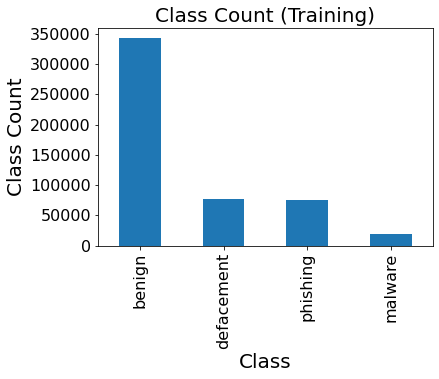

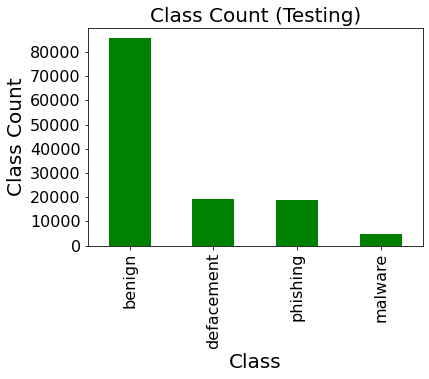

In [95]:
# Print counts of each class
print("- Counting Splits -")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

# Graph counts of each class, for both training and testing
count_train_classes = pd.value_counts(train_df['type'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation= 90)
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['type'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)
plt.show()

# Tokenization
Create our tokenizer by splitting URLs into their domains, subdomains, directories, files, and extensions.

In [96]:
# Define tokenizer
#   The purpose of a tokenizer is to separate the features from the raw data


def tokenizer(url):
  """Separates feature words from the raw data
  Keyword arguments:
    url ---- The full URL
    
  :Returns -- The tokenized words; returned as a list
  """
  
  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)
  
  for i in tokens:
    # Include the splits extensions and subdomains
    if i.find(".") >= 0:
      dot_split = i.split('.')
      
      # Remove .com and www. since they're too common
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")
      
      tokens += dot_split
      
  return tokens
    
print("\n### Tokenizer defined ###\n")


### Tokenizer defined ###



## Task 1 - Tokenize a URL
1. Print the full URL, **test_url**
2. Print the results of **tokenizer(test_url)**

In [97]:
# Let's see how our tokenizer changes our URLs

print("\n- Full URL -\n")
print(test_url)

# Tokenize test URL
print("\n- Tokenized Output -\n")
tokenized_url = tokenizer(test_url)
print(tokenized_url)


- Full URL -

http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0

- Tokenized Output -

['http:', '', 'adventure', 'nicaragua.net', 'index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0', 'nicaragua', 'net', 'index', 'php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0']


# Vectorize the Data
Now that the training data has been loaded, we'll train the vectorizers to turn our features into numbers.

# Training the vectorizers

1. Create the count vectorizer **cVec** using the **CountVectorizer** function
2. Configure *cVec* to use the *tokenizer* function from earlier
3. Perform **fit_transform** on *cVec* to train the vectorizer with the *training URLs*\
a. Save the result as **count_X**


4. Create the TF-IDF vectorizer **tVec** using the **TfidfVectorizer** function
5. Configure *tVec* to use the *tokenizer* function from earlier
6. Perform **fit_transform** on *tVec* to train the vectorizer with the *training URLs*\
a. Save the result as **tfidf_X** 

In [98]:
print("- Training Count Vectorizer -")
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_df['url'])

print("- Training TF-IDF Vectorizer -")
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_df['url'])


print("\n### Vectorizing Complete ###\n")

- Training Count Vectorizer -
- Training TF-IDF Vectorizer -

### Vectorizing Complete ###



## Count the test URL tokens
1. Print the count of each *token* from **test_url**

In [99]:
# Manually perform term count on test_url
for i in list(dict.fromkeys(tokenized_url)):
  print("{} - {}".format(tokenized_url.count(i), i))

1 - http:
1 - 
1 - adventure
1 - nicaragua.net
1 - index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0
1 - nicaragua
1 - net
1 - index
1 - php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0


## View the test URL vectorizers
1. Create a new **CountVectorizer** and **TfidfVectorizer** for demonstration
2. Train the new vectorizers on **test_url** using **fit_transform**
3. Print the results of each *transform*

In [100]:
example_cVec = CountVectorizer(tokenizer=tokenizer)
example_X = example_cVec.fit_transform([test_url])

print("\n- Count Vectorizer (Test URL) -\n")
print(example_X)

print()
print("=" * 50)
print()

example_tVec = TfidfVectorizer(tokenizer=tokenizer)
example_X = example_tVec.fit_transform([test_url])

print("\n- TFIDF Vectorizer (Test URL) -\n")
print(example_X)


- Count Vectorizer (Test URL) -

  (0, 2)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 4)	1
  (0, 6)	1
  (0, 5)	1
  (0, 3)	1
  (0, 8)	1



- TFIDF Vectorizer (Test URL) -

  (0, 8)	0.3333333333333333
  (0, 3)	0.3333333333333333
  (0, 5)	0.3333333333333333
  (0, 6)	0.3333333333333333
  (0, 4)	0.3333333333333333
  (0, 7)	0.3333333333333333
  (0, 1)	0.3333333333333333
  (0, 0)	0.3333333333333333
  (0, 2)	0.3333333333333333


# Test and Evaluate the Models
OK, I have my training data loaded and our testing data loaded. Now it's time to train and evaluate our models.

But first, I am going to define a helper function to display our evaluation reports.

## Vectorize the testing data
1. Use **cVec** to *transform* **test_df['URLs']**\
a. Save the result as **test_count_X**

2. Use **tVec** to *transform* **test_df['URLs']**\
a. Save the result as **test_tfidf_X**

In [101]:
# Vectorize the testing inputs
#   Use 'transform' instead of 'fit_transform' because we've already trained our vectorizers

print("- Count Vectorizer -")
test_count_X = cVec.transform(test_df['url'])

print("- TFIDF Vectorizer -")
test_tfidf_X = tVec.transform(test_df['url'])


print("\n### Vectorizing Complete ###\n")

- Count Vectorizer -
- TFIDF Vectorizer -

### Vectorizing Complete ###



In [102]:
# Define report generator

def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model
    
  :Returns -- N/A
  """
  
  # Transform cmatrix because Sklearn has pred as columns and actual as rows.
  cmatrix = cmatrix.T
  
  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['benign', 'defacement', 'phishing', 'malware'],
              yticklabels=['benign', 'defacement', 'phishing', 'malware'])

  plt.xticks(rotation='vertical', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()
  

print("\n### Report Generator Defined ###\n")


### Report Generator Defined ###



## Training and evaluating the MNB-TFIDF model
1. Create **mnb_tfidf** as a **MultinomialNB()** constructor
2. Use **fit** to train *mnb_tfidf* on the training data (*tfidf_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_tfidf_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *mnb_tfidf* to calculate model accuracy; save the results as **score_mnb_tfidf**\
b. Use the **predict** function in *mnb_tfidf* to generate model predictions; save the results as **predictions_mnb_tfidf**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_mnb_tfidf**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_mnb_tfidf**


### Model Built ###

              precision    recall  f1-score   support

      benign       0.87      1.00      0.93     85543
  defacement       0.98      0.97      0.97     19044
     malware       0.99      0.82      0.90      4726
    phishing       0.98      0.38      0.55     18912

    accuracy                           0.90    128225
   macro avg       0.96      0.79      0.84    128225
weighted avg       0.91      0.90      0.88    128225



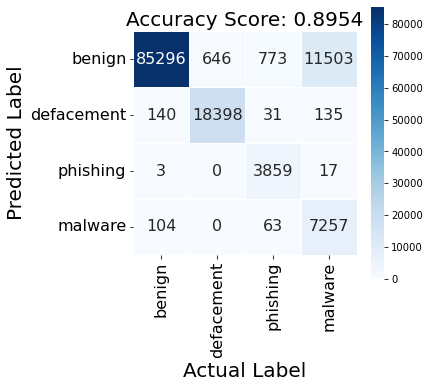

In [103]:
# Multinomial Naive Bayesian with TF-IDF

# Train the model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix(test_labels, predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report(test_labels, predictions_mnb_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)

# Training and evaluating the MNB-Count model
1. Create **mnb_count** as a **MultinomialNB()** constructor
2. Use **fit** to train *mnb_count* on the training data (*count_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_count_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *mnb_count* to calculate model accuracy; save the results as **score_mnb_count**\
b. Use the **predict** function in *mnb_count* to generate model predictions; save the results as **predictions_mnb_count**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_mnb_count**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_mnb_count**


### Model Built ###

              precision    recall  f1-score   support

      benign       0.92      0.98      0.95     85543
  defacement       0.93      0.99      0.96     19044
     malware       0.99      0.87      0.93      4726
    phishing       0.88      0.58      0.70     18912

    accuracy                           0.92    128225
   macro avg       0.93      0.86      0.88    128225
weighted avg       0.92      0.92      0.91    128225



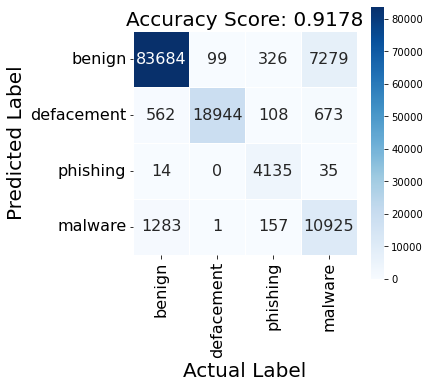

In [104]:
# Multinomial Naive Bayesian with Count Vectorizer

# Train the model
mnb_count = MultinomialNB()
mnb_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix(test_labels, predictions_mnb_count)
creport_mnb_count = classification_report(test_labels, predictions_mnb_count)

print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)

# Training and evaluating the LGS-TFIDF model
1. Create **lgs_tfidf** as a **LogisticRegression()** constructor, using the **lbfgs** *solver*
2. Use **fit** to train *lgs_tfidf* on the training data (*tfidf_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_tfidf_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *lgs_tfidf* to calculate model accuracy; save the results as **score_lgs_tfidf**\
b. Use the **predict** function in *lgs_tfidf* to generate model predictions; save the results as **predictions_lgs_tfidf**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_lgs_tfidf**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_lgs_tfidf**

/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Model Built ###

              precision    recall  f1-score   support

      benign       0.93      0.99      0.96     85543
  defacement       0.93      1.00      0.96     19044
     malware       0.98      0.92      0.95      4726
    phishing       0.92      0.63      0.75     18912

    accuracy                           0.93    128225
   macro avg       0.94      0.88      0.90    128225
weighted avg       0.93      0.93      0.93    128225



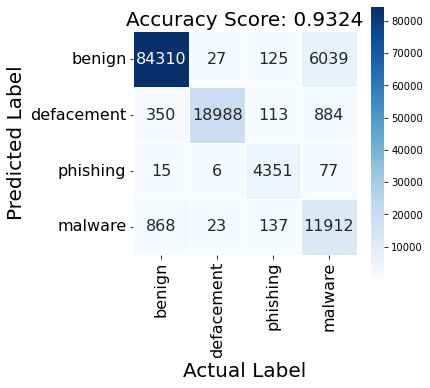

In [105]:
# Logistic Regression with TF-IDF

# Train the model
lgs_tfidf = LogisticRegression(solver='lbfgs')
lgs_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_tfidf = lgs_tfidf.score(test_tfidf_X, test_labels)
predictions_lgs_tfidf = lgs_tfidf.predict(test_tfidf_X)
cmatrix_lgs_tfidf = confusion_matrix(test_labels, predictions_lgs_tfidf)
creport_lgs_tfidf = classification_report(test_labels, predictions_lgs_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_tfidf, score_lgs_tfidf, creport_lgs_tfidf)

# Training and evaluating the LGS-Count model
1. Create **lgs_count** as a **LogisticRegression()** constructor, using the **lbfgs** *solver*
2. Use **fit** to train *lgs_count* on the training data (*count_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_count_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *lgs_count* to calculate model accuracy; save the results as **score_lgs_count**\
b. Use the **predict** function in *lgs_count* to generate model predictions; save the results as **predictions_lgs_count**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_lgs_count**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_lgs_count**

/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Model Built ###

              precision    recall  f1-score   support

      benign       0.96      0.98      0.97     85543
  defacement       0.99      1.00      0.99     19044
     malware       0.99      0.94      0.96      4726
    phishing       0.91      0.79      0.85     18912

    accuracy                           0.96    128225
   macro avg       0.96      0.93      0.94    128225
weighted avg       0.96      0.96      0.96    128225



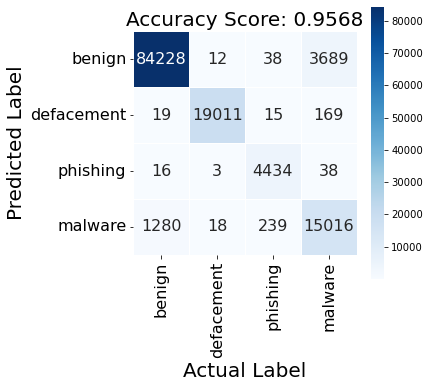

In [106]:
# Logistic Regression with Count Vectorizer

# Train the model
lgs_count = LogisticRegression(solver='lbfgs')
lgs_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_count = lgs_count.score(test_count_X, test_labels)
predictions_lgs_count = lgs_count.predict(test_count_X)
cmatrix_lgs_count = confusion_matrix(test_labels, predictions_lgs_count)
creport_lgs_count = classification_report(test_labels, predictions_lgs_count)

print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_count, score_lgs_count, creport_lgs_count)

# Testing Our Model  With External Url

In [215]:
def testing():
    list_1 = []
    url = input("enter the url for security analysis: ")
    list_1.append(url)
    testing_ = pd.DataFrame(data = list_1, columns = ['url'])
    test_count_d = cVec.transform(testing_['url'])
    result = mnb_tfidf.predict(test_count_d)
    return f"This url is: {result[-1]}"
testing()

enter the url for security analysis: https://mail.google.com/mail/u/0/#search/iniabasi+/FMfcgzGmtNbQsDmXvhpnXtkpGfZvHfMM


'This url is: benign'

# Creating and Esemble Learning 
 I want to creat a esemble learning so that all the models can work together to make decis

In [214]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import model_selection
# estimators = [mnb_count, lgs_count]

# # Defining the ensemble model
# ensemble = VotingClassifier(estimators)
# ensemble.fit(count_X, labels)
# y_pred = ensemble.predict(test_count_X)

#Confisuin matrix
# cm_HybridEnsembler = confusion_matrix(y_test, y_pred)

In [213]:
# #Cross-Validation
# kfold = model_selection.KFold(n_splits=2)
# results = model_selection.cross_val_score(ensemble, count_X, labels, cv=kfold)
# print(results.mean())